<a href="https://colab.research.google.com/github/ChinarVyas/Evaluation-Projects/blob/main/Baseball_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Description
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins.


-- Input features-
1.	W - This indicates the number of Wins credited to a pitcher: number of games where pitcher was pitching while their team took the lead and went on to win, also the starter needs to pitch at least 5 innings of work.
2.	R - This indicates Runs scored. A run is scored when a player advances around first, second and third base and returns safely to home plate, touching the bases in that order, before three outs are recorded and all obligations to reach base safely on batted balls are met or assured: number of times a player crosses home plate.
3.	AB - This means At bat or time at bat. It's is a batter's turn batting against a pitcher: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction.
4.	H - This means Hit. It's also called a "base hit", is credited to a batter when the batter safely reaches or passes first base after hitting the ball into fair territory, without the benefit of either an error or a fielder's choice: reaching base because of a batted, fair ball without error by the defense.
5.	2B - This means the act of a batter striking the pitched ball and safely reaching second base without being called out by the umpire, without the benefit of a fielder's misplay (see error) or another runner being put out on a fielder's choice. A double is a type of hit (the others being the single, triple and home run) and is sometimes called a "two-bagger" or "two-base hit": hits on which the batter reaches second base safely without the contribution of a fielding error.
6.	3B - This measns a Triple.It's is the act of a batter safely reaching third base after hitting the ball, with neither the benefit of a fielder's misplay nor another runner being put out on a fielder's choice. A triple is sometimes called a "three-bagger" or "three-base hit": hits on which the batter reaches third base safely without the contribution of a fielding error.
7.	HR - This means Home runs. It's scored when the ball is hit in such a way that the batter is able to circle the bases and reach home plate safely in one play without any errors being committed by the defensive team. A home run is usually achieved by hitting the ball over the outfield fence between the foul poles (or hitting either foul pole) without the ball touching the field: hits on which the batter successfully touched all four bases, without the contribution of a fielding error.
8.	BB - This means Base on balls (also called a "walk"). It occurs in baseball when a batter receives four pitches that the umpire calls balls, and is in turn awarded first base without the possibility of being called out: hitter not swinging at four pitches called out of the strike zone and awarded first base.
9.	SO - Also denoted as "K" means Strikeout. It occurs when a batter accumulates three strikes during a time at bat. It usually means that the batter is out: number of batters who received strike three.
10.	SB - This means Stolen base. It occurs when a runner advances to a base to which they are not entitled and the official scorer rules that the advance should be credited to the action of the runner: number of bases advanced by the runner while the ball is in the possession of the defense.
11.	RA - This means Run Average. It refer to measures of the rate at which runs are allowed or scored.
12.	ER - This means Earned run. It refers to any run that was fully enabled by the offensive team's production in the face of competent play from the defensive team: number of runs that did not occur as a result of errors or passed balls.
13.	ERA - This means Earned Run Average. It refers to the average of earned runs allowed by a pitcher per nine innings pitched (i.e. the traditional length of a game). It is determined by dividing the number of earned runs allowed by the number of innings pitched and multiplying by nine: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched.
14.	CG - This means Complete Game. It's the act of a pitcher pitching an entire game without the benefit of a relief pitcher. A pitcher who meets this criterion will be credited with a complete game regardless of the number of innings played: number of games where player was the only pitcher for their team.
15.	SHO - This means Shutout. It refers to the act by which a single pitcher pitches a complete game and does not allow the opposing team to score a run: number of complete games pitched with no runs allowed.
16.	SV - This means Save. It's credited to a pitcher who finishes a game for the winning team under certain prescribed circumstances: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings.
17.	E - This means Errors. It's an act, in the judgment of the official scorer, of a fielder misplaying a ball in a manner that allows a batter or baserunner to advance one or more bases or allows a plate appearance to continue after the batter should have been put out. The term error is sometimes used to refer to the play during which an error was committed: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result.

-- Output: Number of predicted wins (W)
To understand the columns meaning, follow the link given below to understand the baseball statistics: https://en.wikipedia.org/wiki/Baseball_statistics


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import regex as re
from time import time
import seaborn as sns
from scipy.stats import zscore,boxcox
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,explained_variance_score

In [2]:
basecs=pd.read_csv(r'/content/drive/MyDrive/Data Analysis/Data/baseball.csv')

In [3]:
basecs

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [4]:
basecs.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [5]:
basecs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


There are 17 columns with 30 entries each



. Integer Data Type:

int64 is a specific integer data type in Python that's designed to hold whole numbers ranging from -9223372036854775808 to 9223372036854775807.
It stores numerical values in a compact binary format, without any extra characters like whitespace.
ref"https://numpy.org/doc/stable/reference/arrays.dtypes.html"

**As int64 does not have whitespaces no action taken. As there are no null values moving on to the next step**

In [6]:
basecs.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


On the basis of the above chart we see that the data spread is high and the data has skewness and outliers

*   we see that the mean is greater than median for "AB","H","HR","CG" shows right skewness.
*   std dev is high which indicates outliers.



In [7]:
basecs.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

<Axes: ylabel='Frequency'>

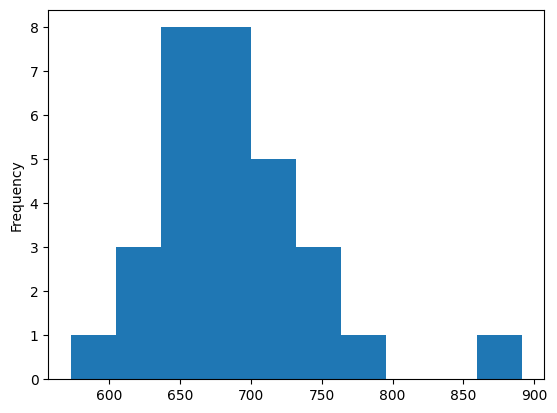

In [8]:
basecs['R'].plot.hist()

<Axes: ylabel='Frequency'>

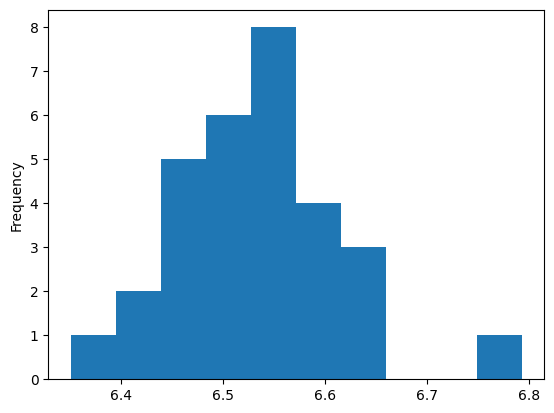

In [9]:
basecs['R']=boxcox(basecs['R'],0)
basecs['R'].plot.hist()

<Axes: ylabel='Frequency'>

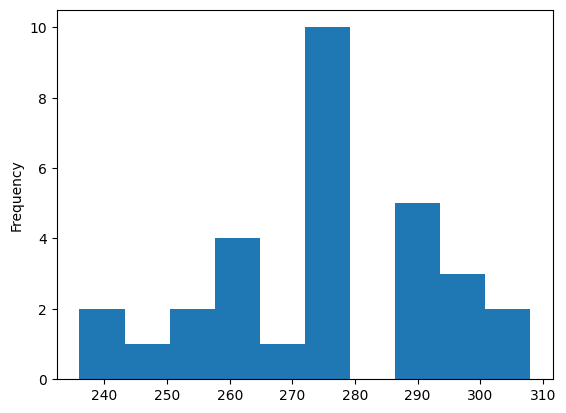

In [10]:
basecs['2B'].plot.hist()

<Axes: ylabel='Frequency'>

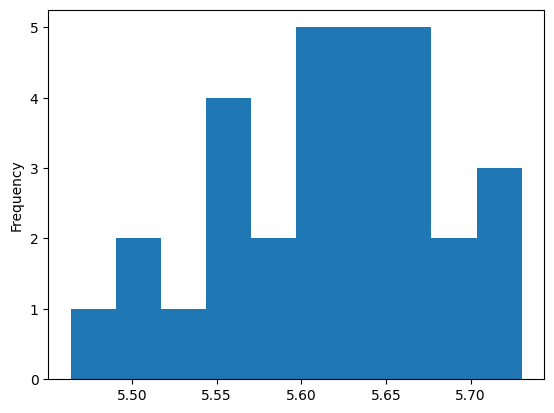

In [11]:
basecs['2B']=boxcox(basecs['2B'],0)
basecs['2B'].plot.hist()

<Axes: ylabel='Frequency'>

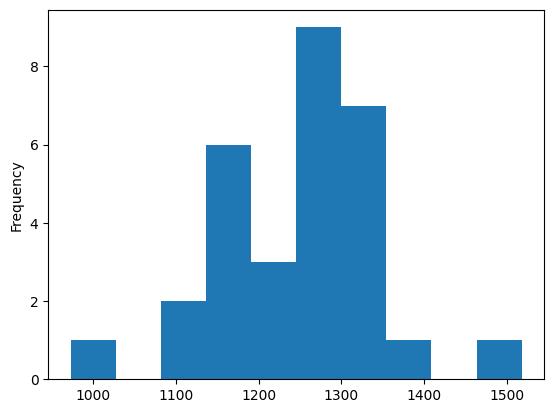

In [12]:
basecs['SO'].plot.hist()

<Axes: ylabel='Frequency'>

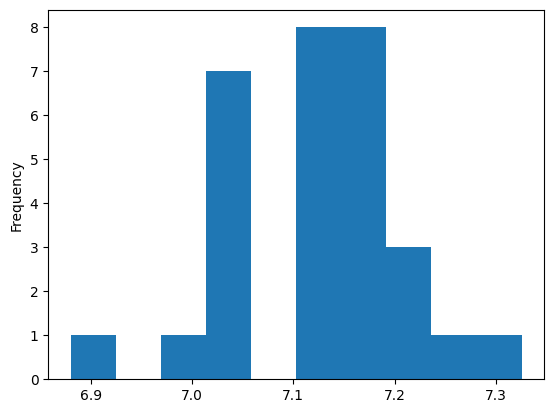

In [13]:
basecs['SO']=boxcox(basecs['SO'],0)
basecs['SO'].plot.hist()

In [14]:
basecs.skew()

W      0.047089
R      0.744196
AB     0.183437
H      0.670254
2B    -0.375624
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.540955
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

W         Axes(0.125,0.653529;0.110714x0.226471)
R      Axes(0.257857,0.653529;0.110714x0.226471)
AB     Axes(0.390714,0.653529;0.110714x0.226471)
H      Axes(0.523571,0.653529;0.110714x0.226471)
2B     Axes(0.656429,0.653529;0.110714x0.226471)
3B     Axes(0.789286,0.653529;0.110714x0.226471)
HR        Axes(0.125,0.381765;0.110714x0.226471)
BB     Axes(0.257857,0.381765;0.110714x0.226471)
SO     Axes(0.390714,0.381765;0.110714x0.226471)
SB     Axes(0.523571,0.381765;0.110714x0.226471)
RA     Axes(0.656429,0.381765;0.110714x0.226471)
ER     Axes(0.789286,0.381765;0.110714x0.226471)
ERA           Axes(0.125,0.11;0.110714x0.226471)
CG         Axes(0.257857,0.11;0.110714x0.226471)
SHO        Axes(0.390714,0.11;0.110714x0.226471)
SV         Axes(0.523571,0.11;0.110714x0.226471)
E          Axes(0.656429,0.11;0.110714x0.226471)
dtype: object

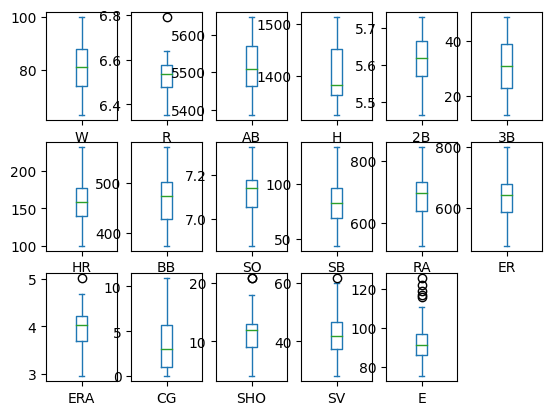

In [15]:
basecs.plot(kind='box',subplots=True,layout=(3,6))




---



---


*Created univariate vizualizations to understand the outliers from the data which needs to be treated before proceeding further\*

---



---



In [16]:
z=np.abs(zscore(basecs))
z

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,1.365409,0.665385,0.847731,1.663685,1.375821,1.041193,0.787299,1.534902,2.953147,0.913883,0.666234,0.505110,0.506955,0.539806,0.814629,1.671607,0.461470
1,0.197838,0.179624,0.711094,0.970681,0.157941,1.235809,0.243967,0.536592,0.192242,0.601826,0.165971,0.248930,0.254598,0.539806,0.172800,0.249879,0.607197
2,0.003243,0.307662,1.115233,0.151891,1.527746,0.223808,0.723377,1.139144,0.871047,0.111449,0.680339,0.751623,0.641347,2.772641,0.320914,0.654856,1.117242
3,0.483244,1.204801,0.241522,0.401088,0.809094,0.418423,0.883181,1.160536,0.125773,0.690985,0.180076,0.103922,0.053010,1.300442,0.567771,0.784104,0.485758
4,0.677839,0.055130,1.280738,1.984081,0.805459,1.722347,0.403770,0.251360,0.144595,0.022290,1.618803,1.597501,1.531318,1.300442,0.172800,1.042600,0.607197
5,1.170814,3.221588,0.104884,1.361089,1.777643,1.391501,2.185047,1.798742,0.933550,0.200609,0.257184,0.389104,0.350165,1.300442,0.320914,1.171848,0.461470
6,0.587028,1.327690,0.732263,0.116292,0.120179,1.196885,1.545833,1.513510,0.164899,0.913883,0.137760,0.234429,0.165003,0.171757,1.802057,0.637623,0.097152
7,0.003243,0.476828,0.451289,0.596886,1.654199,1.099578,1.705636,0.910958,0.813130,1.760897,0.067235,0.147424,0.209800,1.275906,0.320914,0.008617,1.262970
8,0.094054,0.776717,0.451289,0.365489,0.212962,0.068115,0.107601,0.590073,0.621952,0.156029,0.652129,0.461608,0.484557,0.907856,0.172800,2.188598,0.048576
9,0.288649,1.067026,1.785913,1.628086,1.067359,0.165423,0.084163,0.158660,0.964923,0.557246,0.913544,0.843461,0.792164,0.171757,0.320914,0.396360,0.194303


In [17]:
baseball=basecs[(z<3).all(axis=1)]

In [18]:
baseball.shape

(29, 17)

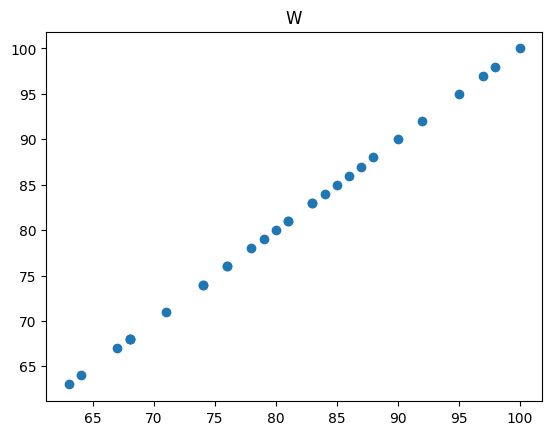

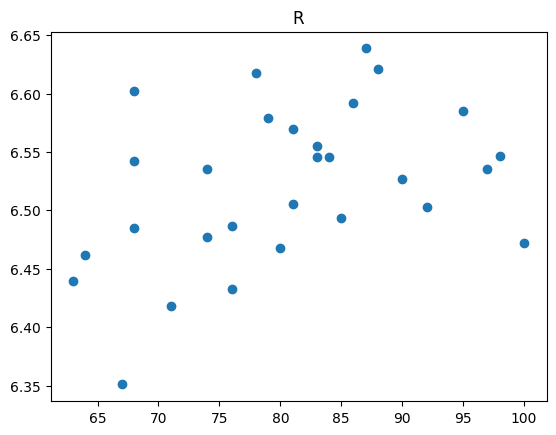

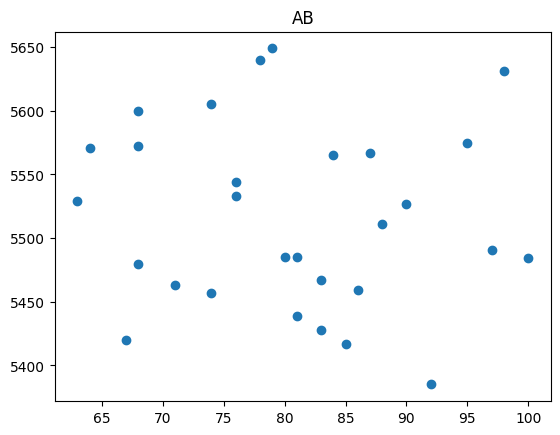

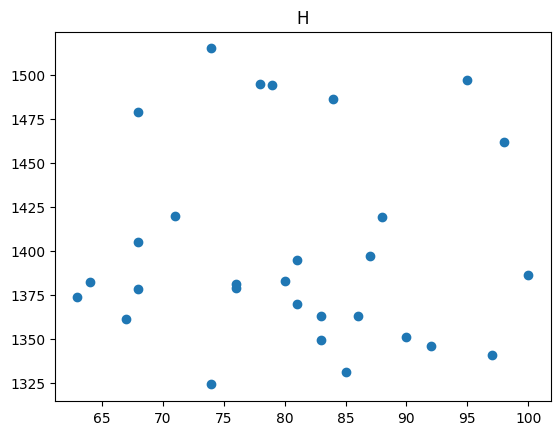

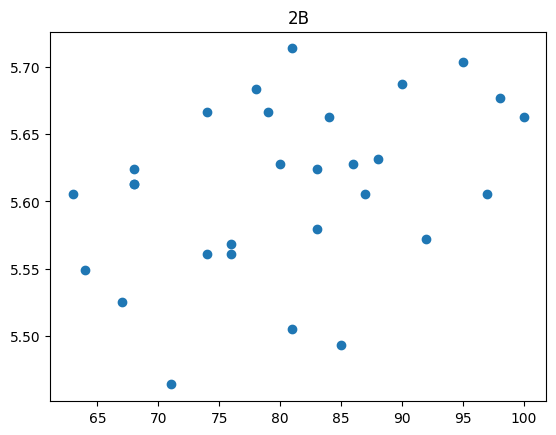

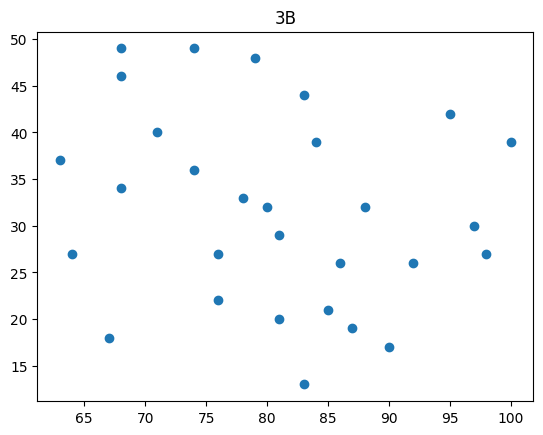

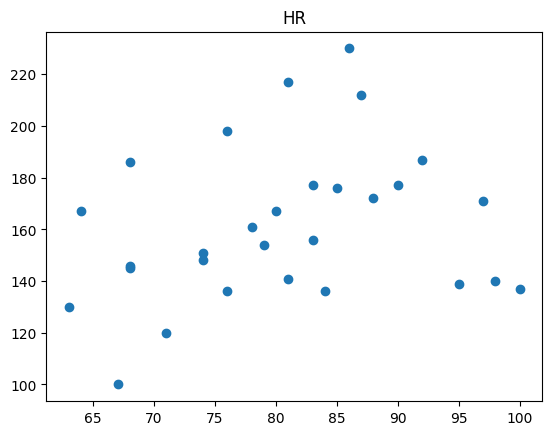

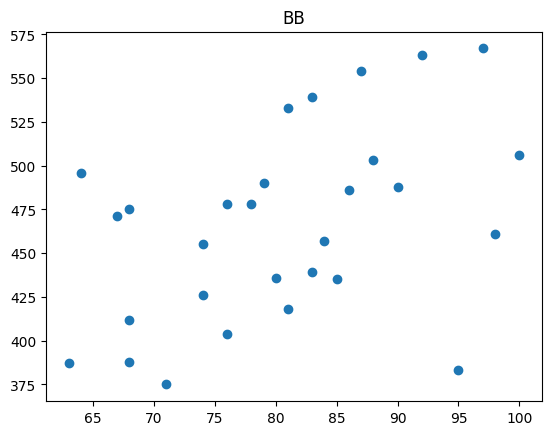

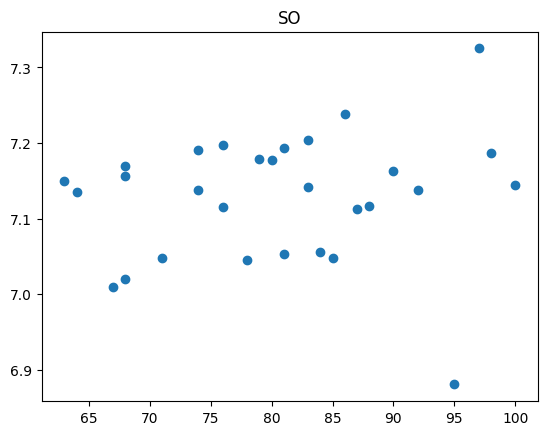

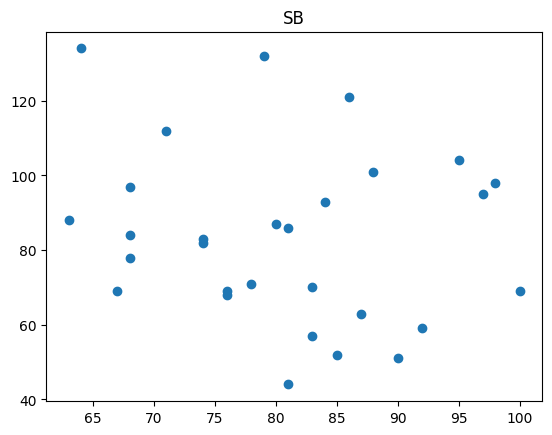

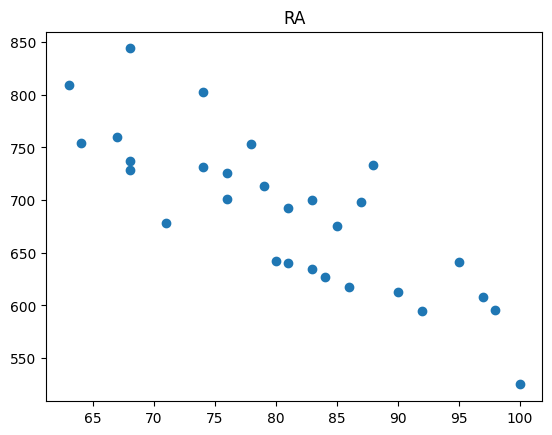

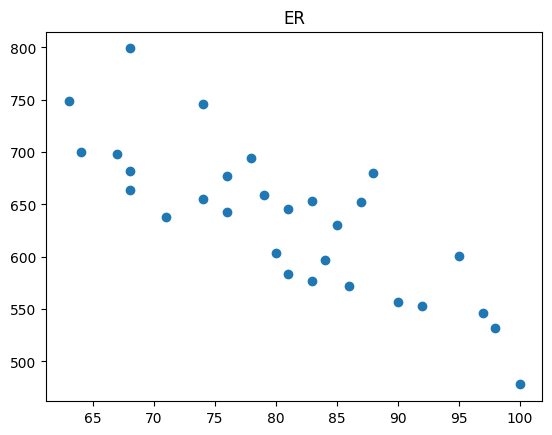

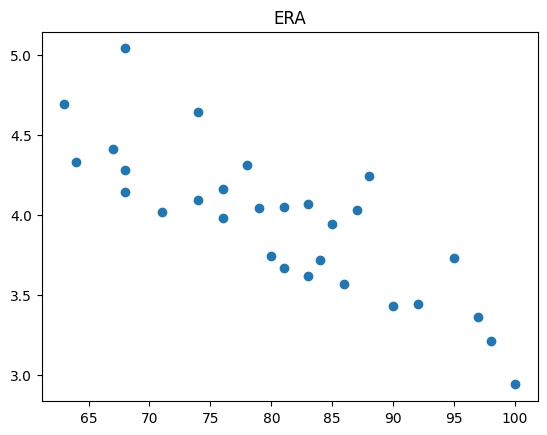

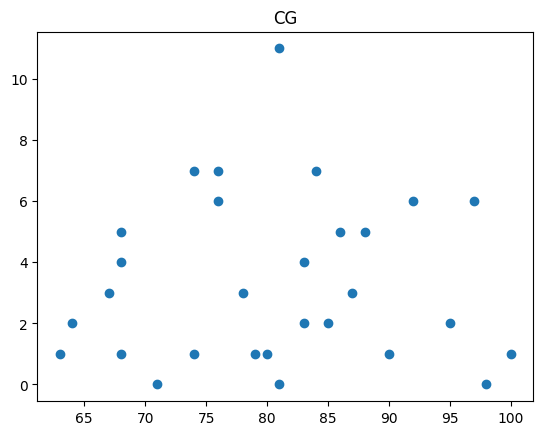

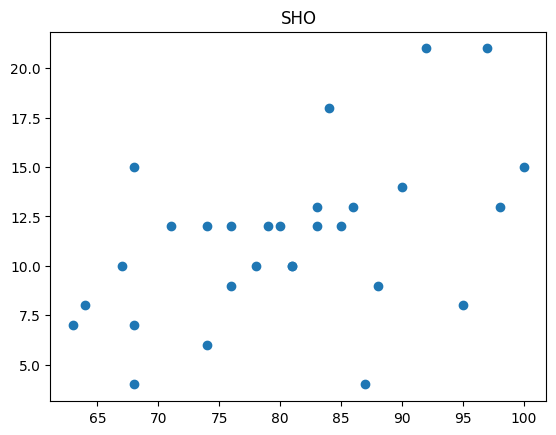

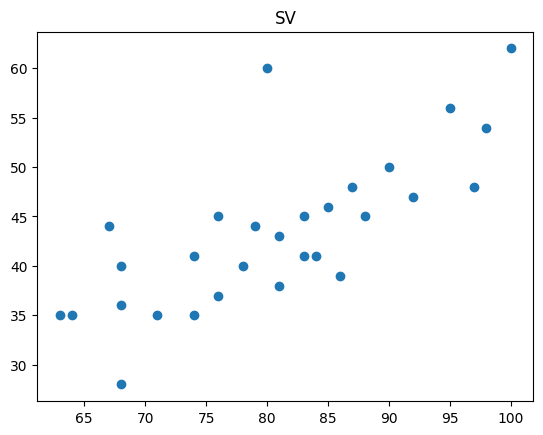

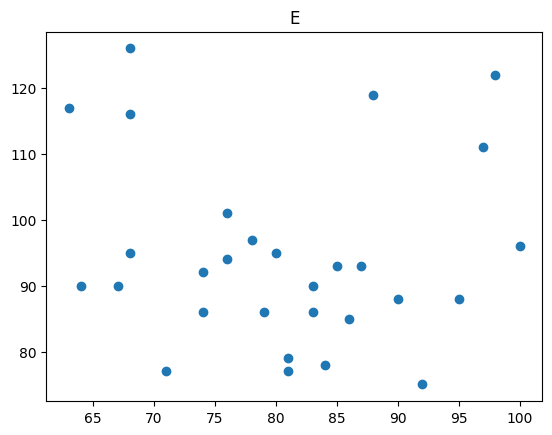

In [19]:
for i in baseball:
  x="W"
  y=i
  plt.scatter(x,y,data= baseball)
  plt.title(i)
  plt.show()


---
---
*Multivariate analysis to vizulize the positive and inverse relations of the columns against the outcome***

---

---
suprizingly the team with the lowest average seem to have won more matches.


---


---




<Axes: >

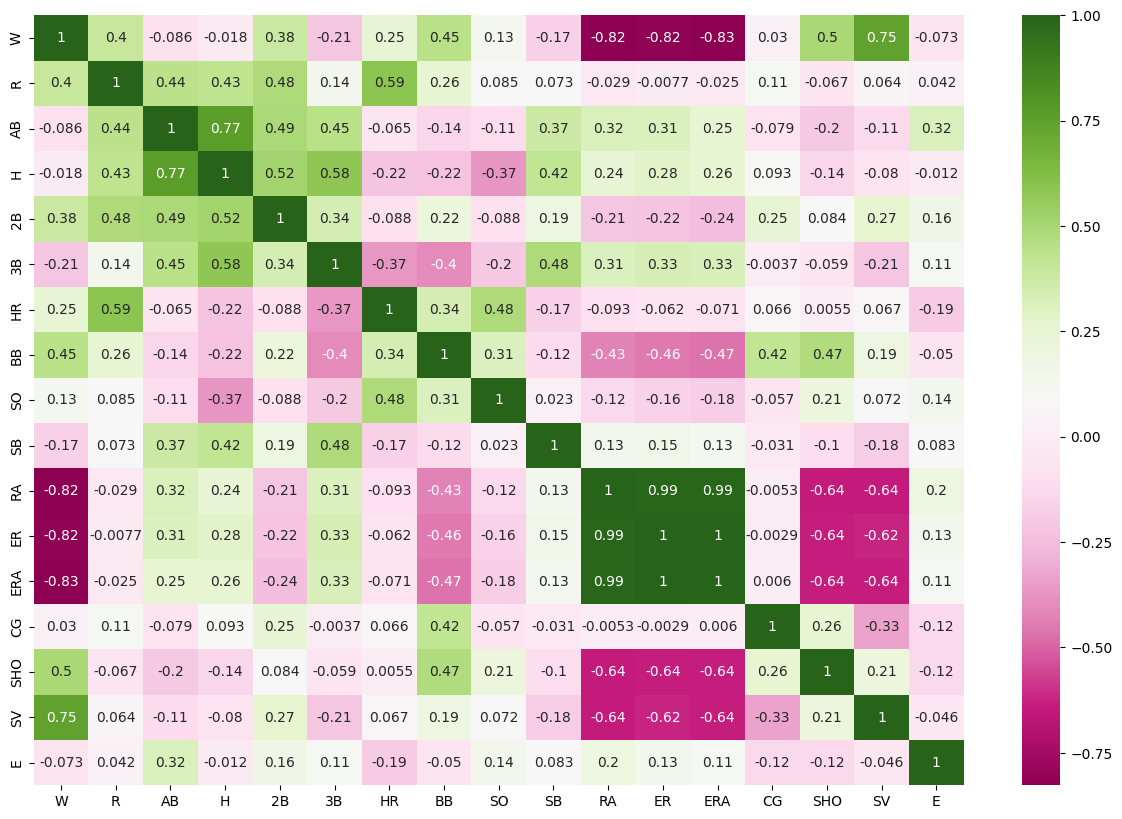

In [20]:
plt.figure(figsize=(15,10))
sns.heatmap(baseball.corr(), annot=True,cmap='PiYG')



---
**"RA',"ERA","ER" are negatively related to the outcome.**


---

# ERA - This means Earned Run Average. It refers to the average of earned runs allowed by a pitcher per nine innings pitched (i.e. the traditional length of a game). It is determined by dividing the number of earned runs allowed by the number of innings pitched and multiplying by nine: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched.


---



---

> *As while calculating ERA, ER was a part of it dropping it from the analysis point of view*





In [21]:
baseball.drop('ER',axis=1,inplace=True)

<Axes: >

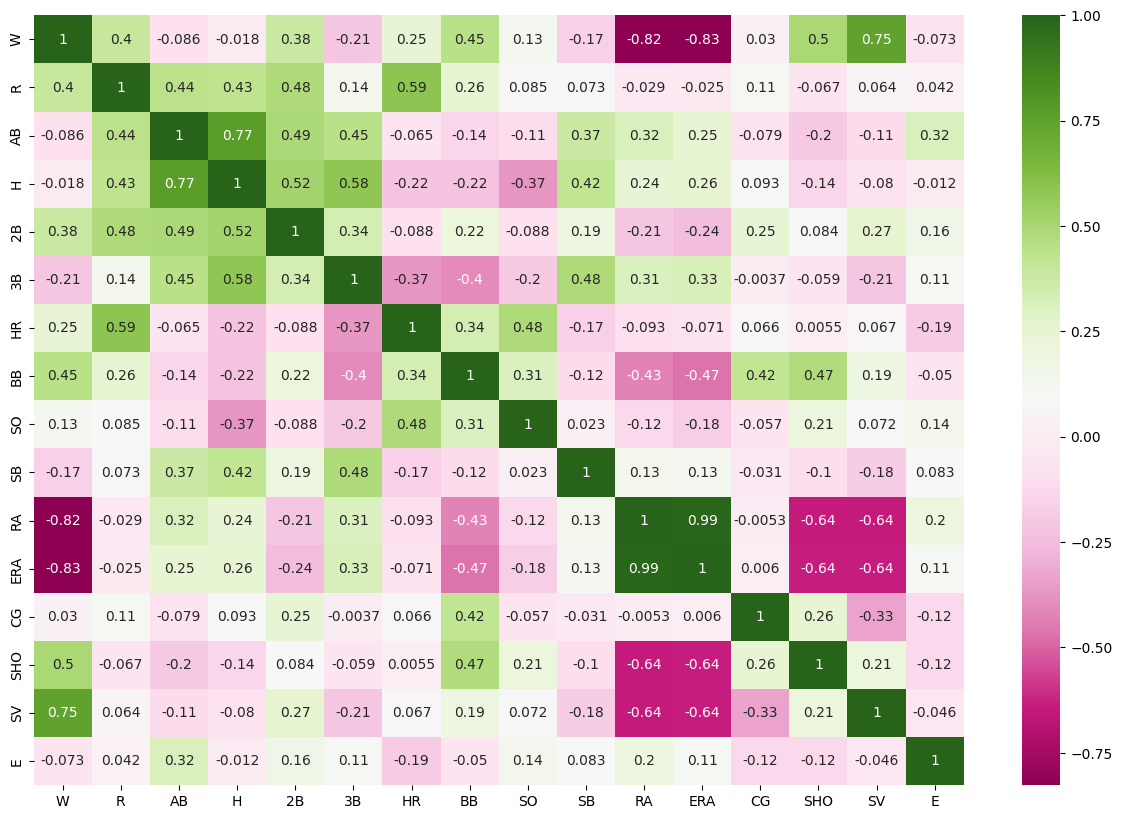

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(baseball.corr(), annot=True,cmap='PiYG')

# Starting with dividing the data in train test and actioning the ML

In [23]:
X=baseball.iloc[:,1:]
X

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ERA,CG,SHO,SV,E
0,6.584791,5575,1497,5.703782,42,139,383,6.880384,104,641,3.73,2,8,56,88
1,6.545350,5467,1349,5.624018,44,156,439,7.142037,70,700,4.07,2,12,45,86
2,6.505784,5439,1395,5.713733,29,141,533,7.053586,86,640,3.67,11,10,38,79
3,6.432940,5533,1381,5.560682,27,136,404,7.115582,68,701,3.98,7,9,37,101
4,6.535241,5605,1515,5.666427,49,151,455,7.138073,83,803,4.64,7,12,35,86
6,6.638568,5567,1397,5.605802,19,212,554,7.112327,63,698,4.03,3,4,48,93
7,6.569481,5485,1370,5.505332,20,217,418,7.193686,44,693,4.05,0,10,43,77
8,6.467699,5485,1383,5.627621,32,167,436,7.177782,87,642,3.74,1,12,60,95
9,6.617403,5640,1495,5.683580,33,161,478,7.045777,71,753,4.31,3,10,40,97
10,6.621406,5511,1419,5.631212,32,172,503,7.117206,101,733,4.24,5,9,45,119


In [24]:
y=baseball.iloc[:,0]
y

0      95
1      83
2      81
3      76
4      74
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

In [25]:
x_train,x_test,y_train,y_test =train_test_split(X,y, test_size=0.30, random_state=42)

In [26]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(20, 15)
(9, 15)
(20,)
(9,)


In [27]:
regressors = [
    KNeighborsRegressor(),
    GradientBoostingRegressor(),
    KNeighborsRegressor(),
    ExtraTreesRegressor(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    LinearRegression(),
    AdaBoostRegressor(),
    xgb.XGBRegressor(),
    Lasso(),
    Ridge()
]

In [28]:
head = 12
for model in regressors[:head]:
    start = time()
    model.fit(x_train, y_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(x_test)
    predict_time = time()-start
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
    print("\tR2 score:", r2_score(y_test, y_pred))
    print()

KNeighborsRegressor()
	Training time: 0.009s
	Prediction time: 0.008s
	Explained variance: 0.23310831234256968
	Mean absolute error: 7.755555555555554
	R2 score: 0.15935012594458475

GradientBoostingRegressor()
	Training time: 0.091s
	Prediction time: 0.003s
	Explained variance: 0.4931262091946296
	Mean absolute error: 9.021136886980992
	R2 score: -0.007811495415403824

KNeighborsRegressor()
	Training time: 0.003s
	Prediction time: 0.003s
	Explained variance: 0.23310831234256968
	Mean absolute error: 7.755555555555554
	R2 score: 0.15935012594458475

ExtraTreesRegressor()
	Training time: 0.201s
	Prediction time: 0.008s
	Explained variance: 0.49288465994962216
	Mean absolute error: 5.966666666666665
	R2 score: 0.3907296977329976

RandomForestRegressor()
	Training time: 0.234s
	Prediction time: 0.008s
	Explained variance: 0.50123758186398
	Mean absolute error: 6.347777777777777
	R2 score: 0.3661541435768264

DecisionTreeRegressor()
	Training time: 0.004s
	Prediction time: 0.002s
	Explaine

**For now  on the basis of the R2^ and MAE Linear model is working better**

---



*   Will now work on hyperparameter tunning
*   List item



In [29]:
parameters = { 'copy_X' : [True, False],
              'fit_intercept':[True, False],
              'n_jobs':[None,-2,-1,1,2] ,
              'positive':[True,False]
             }
grid = GridSearchCV(LinearRegression(),parameters)
model = grid.fit(x_train, y_train)
print(model.best_params_,'\n')
print(model.best_estimator_,'\n')

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': True} 

LinearRegression(positive=True) 



In [30]:
LR= LinearRegression(copy_X= True, fit_intercept= True, n_jobs= None, positive= True)
LR.fit(x_train,y_train)
pred_test_lr=LR.predict(x_test)
print("r2_score is = ",r2_score(y_test,pred_test_lr)*100)
print('mean_absolute_error = ',mean_absolute_error(y_test,pred_test_lr))
print('mean_squared_error = ',mean_squared_error(y_test,pred_test_lr))
print('root_mean_squared_error = ',np.sqrt(mean_squared_error(y_test,pred_test_lr)))

r2_score is =  73.45741963492523
mean_absolute_error =  4.4367072893557395
mean_squared_error =  26.01828248132021
root_mean_squared_error =  5.100811943340021


<Axes: xlabel='W', ylabel='Density'>

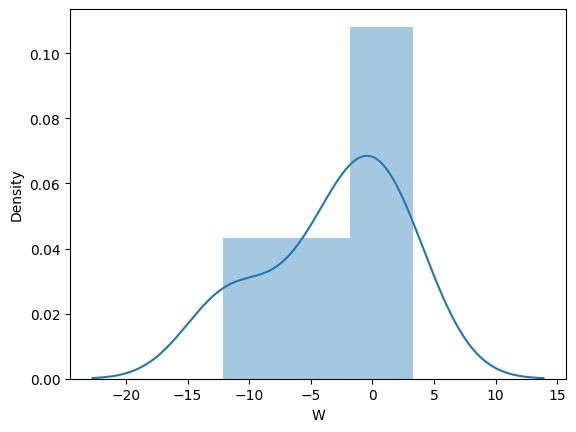

In [31]:
sns.distplot(y_pred-y_test)

In [32]:
scores = cross_val_score(LR, x_train, y_train, scoring='r2', cv=5)
scores

array([ 0.74319757,  0.47114385,  0.47075479, -0.92887668,  0.47962632])

Text(0.5, 1.0, 'Linear Regression')

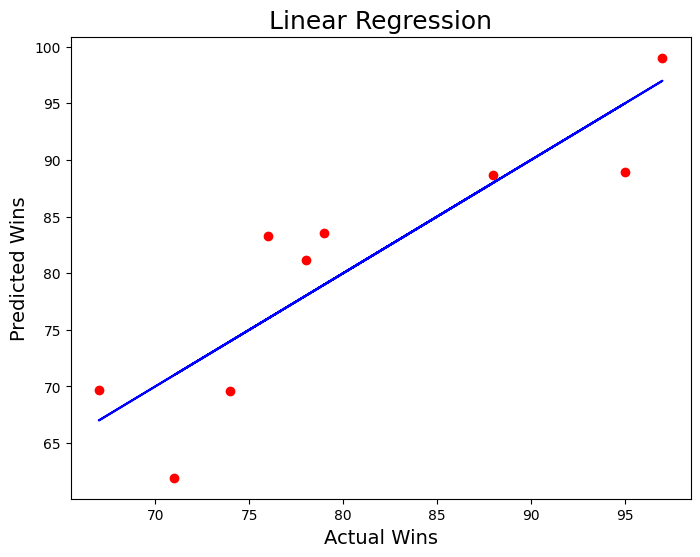

In [33]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test_lr,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Wins',fontsize=14)
plt.ylabel('Predicted Wins',fontsize=14)
plt.title('Linear Regression',fontsize=18)

In [34]:
import joblib
joblib.dump(LR,'linearbcs.joblib')

['linearbcs.joblib']

relations between (W) & ERA :- more the average less are the wins, tried dropping the RA column however the accuracy was still close to 74-75% hence went with the initial set up of keeping RA & ERA and considering them both are different factors.